# HOME EQUITY ANALYSIS

### For analysis on Home Equity, we have collected the data from www.creditanalytics.net
### The dataset reports characteristics and information on home equity loans.
#### Things to consider in our dataset :
BAD: 1 - APPLICANT DEFAULTED LOAN; 0 - APPLICANT PAID LOAN
<br>LOAN: AMOUNT OF LOAN
<br>MORTDUE: EXISTING MORTGAGE DUE
<br>VALUE: VALUE OF CURRENT PROPERTY (COLLATERAL)
<br>REASON: DebtCon - DEBT CONSOLIDATION; HomeImp - HOME IMPROVEMENT
<br>JOB: OCCUPATION
<br>DEBTINC: DEBT TO INCOME RATIO
### We will use Python visualisation libraries primarily for analysis.

### IMPORT LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### IMPORT DATASET

In [2]:
d = pd.read_csv('/Users/saurabhkarambalkar/Desktop/cra/hmeq.csv')
d.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN


### DATA CLEANING

In [39]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
BAD        5960 non-null int64
LOAN       5960 non-null int64
MORTDUE    5442 non-null float64
VALUE      5848 non-null float64
REASON     5708 non-null object
JOB        5681 non-null object
YOJ        5445 non-null float64
DEROG      5252 non-null float64
DELINQ     5380 non-null float64
CLAGE      5652 non-null float64
NINQ       5450 non-null float64
CLNO       5738 non-null float64
DEBTINC    4693 non-null float64
dtypes: float64(9), int64(2), object(2)
memory usage: 605.4+ KB


#### We can take care of missing data by filling it with the either of the central limits i.e. mean, median & mode or by simply dropping off the rows having the missing values.
#### In our case we have multiple data missing within the same observations which makes it difficult for predicting their values. Moreover, the features seems to be dependent with each other thus we cannot randomly fill the missing values so we will choose the best option to drop them from our dataset.

In [40]:
df = d.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3364 entries, 5 to 5959
Data columns (total 13 columns):
BAD        3364 non-null int64
LOAN       3364 non-null int64
MORTDUE    3364 non-null float64
VALUE      3364 non-null float64
REASON     3364 non-null object
JOB        3364 non-null object
YOJ        3364 non-null float64
DEROG      3364 non-null float64
DELINQ     3364 non-null float64
CLAGE      3364 non-null float64
NINQ       3364 non-null float64
CLNO       3364 non-null float64
DEBTINC    3364 non-null float64
dtypes: float64(9), int64(2), object(2)
memory usage: 367.9+ KB


### DATA ANALYSIS

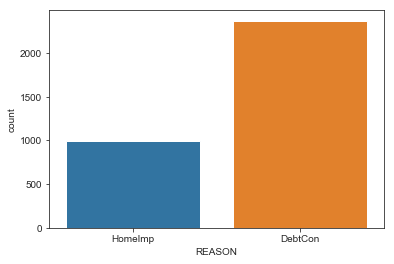

In [45]:
sns.countplot(x ='REASON', data = df)

#### We observe that most of the loan applicants took loan for their debt consolidation rather than home improvement.

/usr/local/lib/python2.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


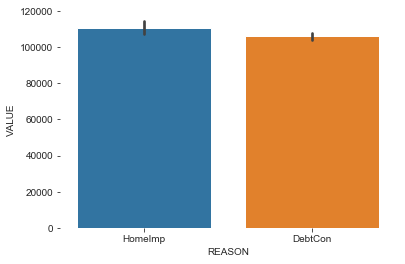

In [5]:
sns.set_style('ticks')
sns.barplot(x='REASON',y='VALUE',data = df)
sns.despine(left=True,bottom=True)

#### Even though the loan was maximum took for Debt Consolidation purpose, from the above graph we observe that the maximum amount was taken for Home Improvement, this is a striking observation.

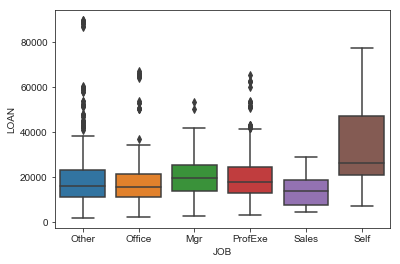

In [6]:
sns.boxplot(x='JOB',y='LOAN',data =df)

#### Most of the loan applicants were the people who were Self Employed. Moreover, it is also observed that Self Employed applicants took big amount of loans.

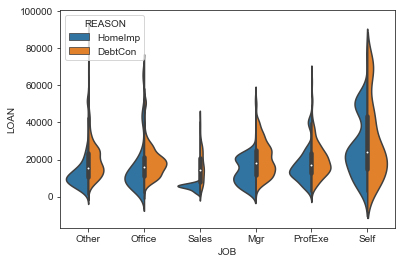

In [7]:
sns.violinplot(x = 'JOB', y = 'LOAN', data = d, hue = 'REASON', split = True)


#### The maximum loan applicant group i.e. the Self Employed took loans for Debt Consolidation.

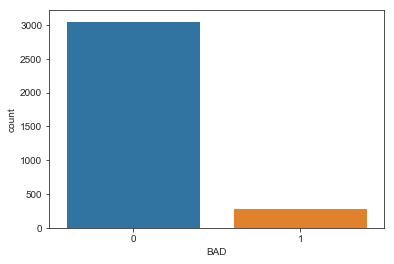

In [44]:
sns.countplot(x ='BAD', data = df)


#### We see that most of the loan applicants have paid their loans but there is small group of people who have defaulted the loan or seriously delinquent.

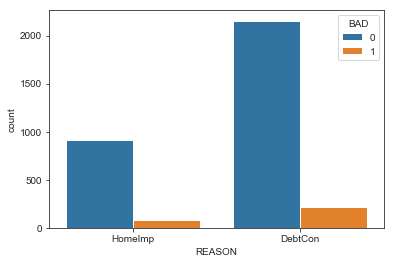

In [49]:
ax = sns.countplot(x ='REASON', data = df, hue = 'BAD')

#### The applicants who defaulted the loan took their loans for Debt Consolidation purpose.

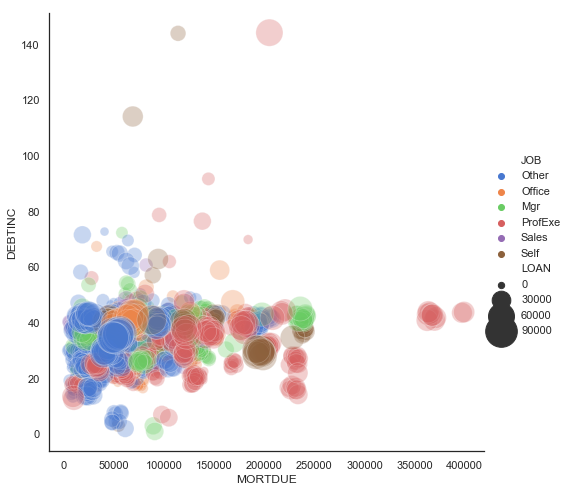

In [72]:
import seaborn as sns
sns.set(style="white")
# Plot miles per gallon against horsepower with other semantics
sns.relplot(x="MORTDUE", y="DEBTINC", hue="JOB", size="LOAN",
            sizes=(40, 1000), alpha=.3, palette="muted",
            height=7, data=df)

#### We observe that the Maximum Mortgage Due falls below 150000 and has a Debt to Income Ratio below 50. The maximum loan applicants within this range are the people with Other job Desciption.

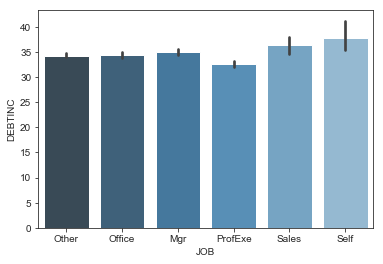

In [55]:
ax = sns.barplot("JOB", y="DEBTINC", data=df, palette="Blues_d")


#### We observe that the Debt to Income ratio of Self Employed people is higher than other categories which clearly explains why most of the Self Employed applicants defaulted on loans.

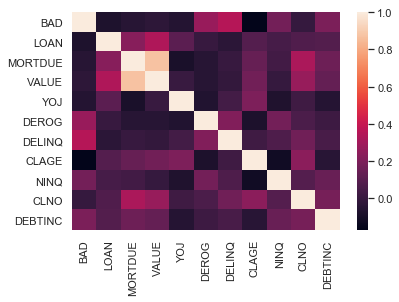

In [73]:
df2 = d.corr()
sns.heatmap(df2)


#### The above heatmap gives us the correlation between the different features in our dataset.

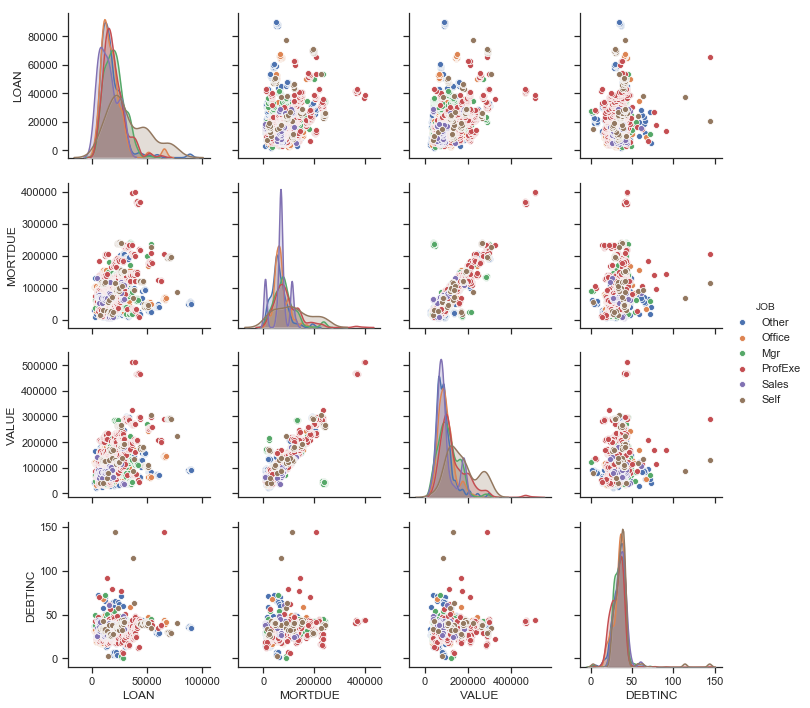

In [71]:
sns.set(style="ticks")
df2 = df[['LOAN','MORTDUE','VALUE','REASON','JOB','DEBTINC']]
sns.pairplot(df2, hue="JOB")


#### Most of the Total Loan value falls within 50000 within Total Mortgage Due of 200000 and has current Total Property Value below 300000 and has Total Debt to Income Ratio below 50.
## This gives us the clear picture that the Investee is safe.